### Multiclass classification Algorithms

1) Naives Bayes
2) KNN
3) Decision Tree
4) Random Forest

Apply algorithms one by one on online_gaming_behavior_dataset.csv dataset where 'EngagementLevel' (Medium, High, and Low) is the target variable. and we have to apply algorithm to check about the class of target variable.  

In [21]:
import pandas as pd
df=pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [16]:
df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [18]:
df['GameDifficulty'].value_counts()

GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

In [20]:
df['GameGenre'].value_counts()

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

In [22]:
df['Location'].value_counts()

Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

In [24]:
df['Gender'].value_counts()

Gender
Male      23959
Female    16075
Name: count, dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [189]:
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [23]:
x=df.drop('EngagementLevel', axis=1)
y=df['EngagementLevel']

In [193]:
y

0        Medium
1        Medium
2          High
3        Medium
4        Medium
          ...  
40029    Medium
40030      High
40031      High
40032    Medium
40033    Medium
Name: EngagementLevel, Length: 40034, dtype: object

In [25]:
x=pd.get_dummies(x,columns=['Gender', 'Location', 'GameGenre'],dtype=int)

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x['GameDifficulty']=label_encoder.fit_transform(x['GameDifficulty'])

In [199]:
x.head()

,PlayerID,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,9000,43,16.271119,0,2,6,108,79,25,0,1,0,0,1,0,0,0,0,0,1
1,9001,29,5.525961,0,2,5,144,11,10,1,0,0,0,0,1,0,0,0,0,1
2,9002,22,8.223755,0,0,16,142,35,41,1,0,0,0,0,1,0,0,0,1,0
3,9003,35,5.265351,1,0,9,85,57,47,0,1,0,0,0,1,1,0,0,0,0
4,9004,33,15.531945,0,2,2,131,95,37,0,1,0,1,0,0,1,0,0,0,0


In [124]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)
y

array([2, 2, 0, ..., 0, 2, 2])

__Applying Naive Bayes Algorithm on online_gaming_behavior_dataset.csv dataset__

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
from itertools import cycle

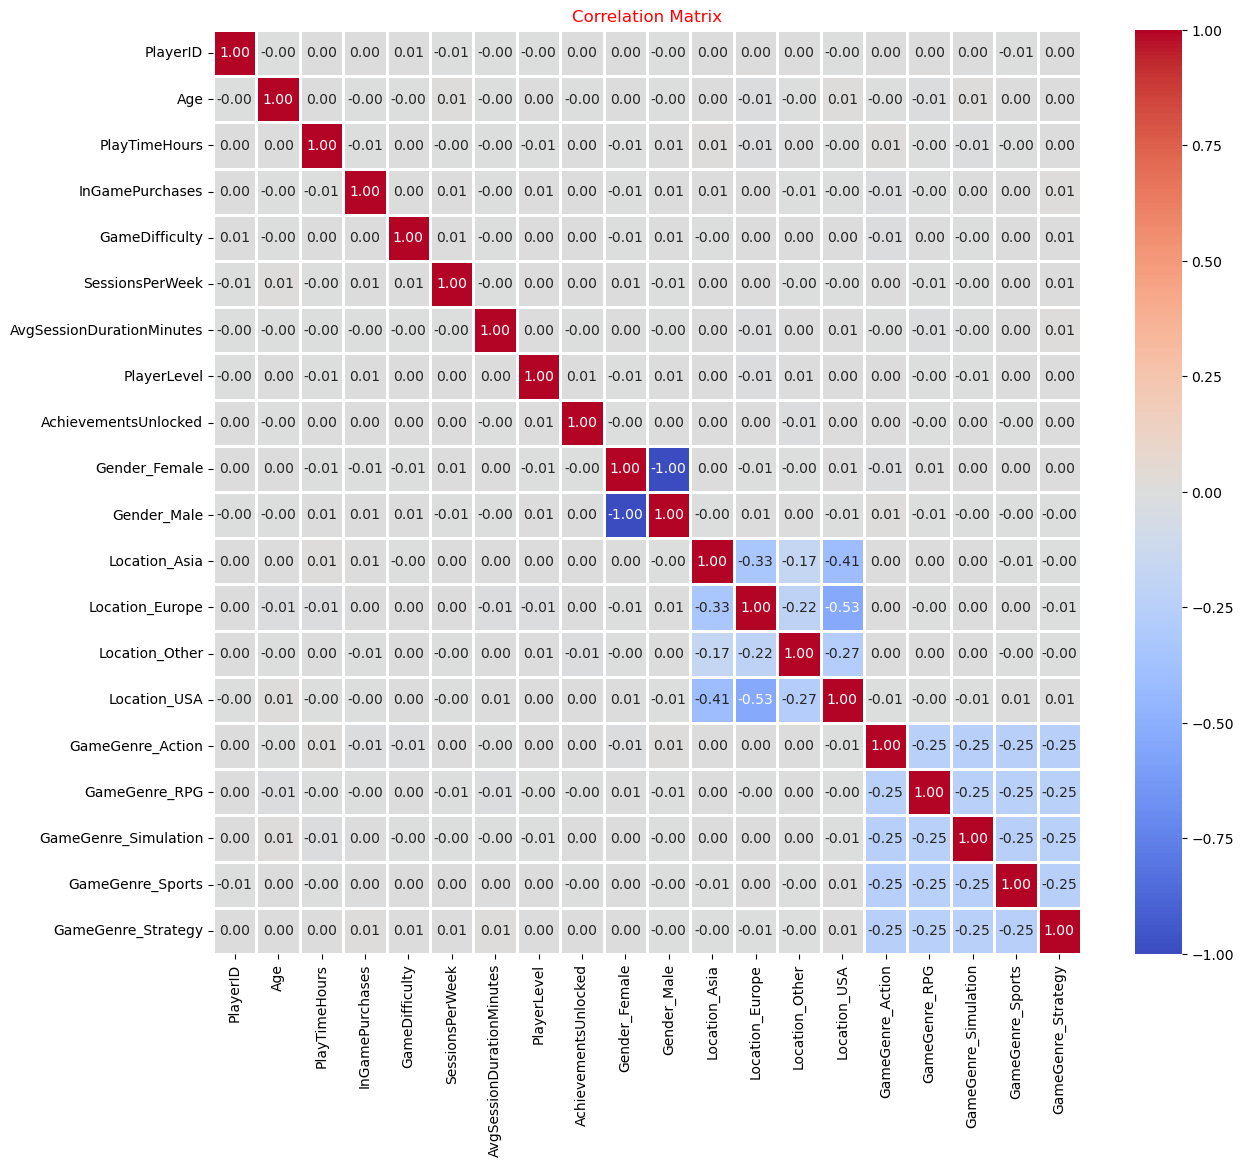

In [203]:
plt.figure(figsize=(14,12))
corr_mat = x.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=2, fmt='.2f')
plt.title('Correlation Matrix', c='r')
plt.show()

In [31]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [33]:
# Apply StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

__Apply Naive Bayes on Online gaming behavior dataset__

In [209]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train_sc, y_train)

GaussianNB()

In [211]:
# Predict on testing set
y_test_pred_nb = nb_model.predict(x_test_sc)
y_pred_prob_nb = nb_model.predict_proba(x_test_sc)

In [171]:
class_order=nb_model.classes_
print('Class Order :',class_order)

result = pd.DataFrame({
    'Actual label' : y_test,
    'Predicted label' : y_test_pred_nb
})
for i, class_name in enumerate(class_order):
    result[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_nb[:,i], 2)
result

Class Order : [0 1 2]


,Actual label,Predicted label,Predicted Probability 0,Predicted Probability 1,Predicted Probability 2
0,2,2,0.21,0.08,0.71
1,2,2,0.19,0.17,0.64
2,2,2,0.01,0.32,0.67
3,2,2,0.22,0.16,0.62
4,2,2,0.33,0.17,0.50
...,...,...,...,...,...
16009,0,0,0.89,0.00,0.11
16010,2,2,0.01,0.45,0.54
16011,2,2,0.25,0.13,0.62
16012,1,1,0.00,0.67,0.33


In [213]:
# or we can see the prediction in terms of high low medium re run the code and skip label encoding of y(target variable)
class_order=nb_model.classes_
print('Class Order :',class_order)

result = pd.DataFrame({
    'Actual label' : y_test,
    'Predicted label' : y_test_pred_nb
})
for i, class_name in enumerate(class_order):
    result[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_nb[:,i], 2)
result

Class Order : ['High' 'Low' 'Medium']


,Actual label,Predicted label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.21,0.08,0.71
22227,Medium,Medium,0.19,0.17,0.64
24899,Medium,Medium,0.01,0.32,0.67
35415,Medium,Medium,0.22,0.16,0.62
21440,Medium,Medium,0.33,0.17,0.50
...,...,...,...,...,...
4026,High,High,0.89,0.00,0.11
12568,Medium,Medium,0.01,0.45,0.54
33805,Medium,Medium,0.25,0.13,0.62
12554,Low,Low,0.00,0.67,0.33


__We can see that the class for which predicted probability is high comes under the predicted label__ 

In [218]:
y_train_pred_nb = nb_model.predict(x_train_sc)
print('Naive Bayes Classifier :')
training_accuracy = accuracy_score(y_train, y_train_pred_nb)
testing_accuracy = accuracy_score(y_test, y_test_pred_nb)

print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Naive Bayes Classifier :
Training Accuracy : 0.8405495420482931
Testing Accuracy : 0.8385162982390408


Confusion Matrix :
[[3239  115  803]
 [  98 2807 1178]
 [ 129  263 7382]]


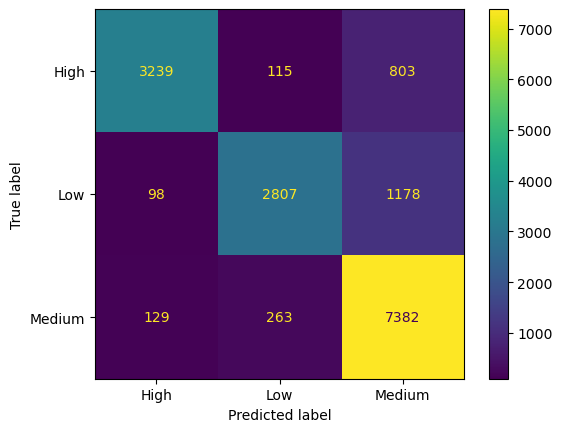

In [247]:
conf_mat = confusion_matrix(y_test, y_test_pred_nb)
print('Confusion Matrix :')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_order)
cm_display.plot()
plt.show()

In [255]:
conf_mat_df = pd.DataFrame(conf_mat, index=class_order, columns=class_order)
print('Confusion Matrix with Class Labels :')
print()
print(conf_mat_df)

Confusion Matrix with Class Labels :

        High   Low  Medium
High    3239   115     803
Low       98  2807    1178
Medium   129   263    7382


__Observation__

The confusion matrix is a 3x3 matrix because it is a multiclass classification problem with three classes (Medium, High, Low).

__High__

This class has a relatively high number of true positives (3239), but also a considerable number of false negatives, indicating that some instances misclassified as Low and medium

__Low__

This class has a moderate number of true positives (2807), but a higher number of false negatives, indicating frequent misclassification of low instances as high or medium.

__Medium__

This class has a very high number of true positives (7382), indicating the model is very good at correctly identifying medium instances.

3239 instances were actually and predicted as high but 115 instances were actually high but incorrectly predicted as low. and so onm instances.

In [268]:
print('Naive Bayes Classification Report :')
print(classification_report(y_test, y_test_pred_nb))

Naive Bayes Classification Report :
              precision    recall  f1-score   support

        High       0.93      0.78      0.85      4157
         Low       0.88      0.69      0.77      4083
      Medium       0.79      0.95      0.86      7774

    accuracy                           0.84     16014
   macro avg       0.87      0.81      0.83     16014
weighted avg       0.85      0.84      0.84     16014



In [282]:
len(set(y_test))

3

In [293]:
y_test[:10]

34667    Medium
22227    Medium
24899    Medium
35415    Medium
21440    Medium
32877      High
34287       Low
7568       High
23191      High
1483        Low
Name: EngagementLevel, dtype: object

In [287]:
y_test_binarized = label_binarize(y_test, classes=class_order)
y_test_binarized[:10]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

The class order is ['High', 'Low', 'Medium'] see y_test and y_test_binarized. actually the label_binarize is a function from Scikit-Learn that is used to convert class labels into a binary format. the class which is present is labeled as 1 and other will be 0 in that row. it is like onehotencoder. in first 5 row class is medium for medium class order index is 2 so 1 for medium labeled in the array at index 2 and so on.

In [319]:
n_classes = y_test_binarized.shape
n_classes

(16014, 3)

In [321]:
n_classes = y_test_binarized.shape[0]
n_classes

16014

In [323]:
n_classes = y_test_binarized.shape[1]
n_classes

3

n_classes = y_test_binarized.shape[1] tells about number of columns(number of classes) in the y_test_binarized means number of classes in y_test

In [333]:
y_score = nb_model.predict_proba(x_test_sc)
y_score    # it is y_pred_prob_nb

array([[0.20672762, 0.08377553, 0.70949685],
       [0.19251197, 0.16992989, 0.63755813],
       [0.0057366 , 0.32479158, 0.66947182],
       ...,
       [0.24658912, 0.12890793, 0.62450295],
       [0.00105987, 0.66966636, 0.32927376],
       [0.00183867, 0.55663503, 0.4415263 ]])

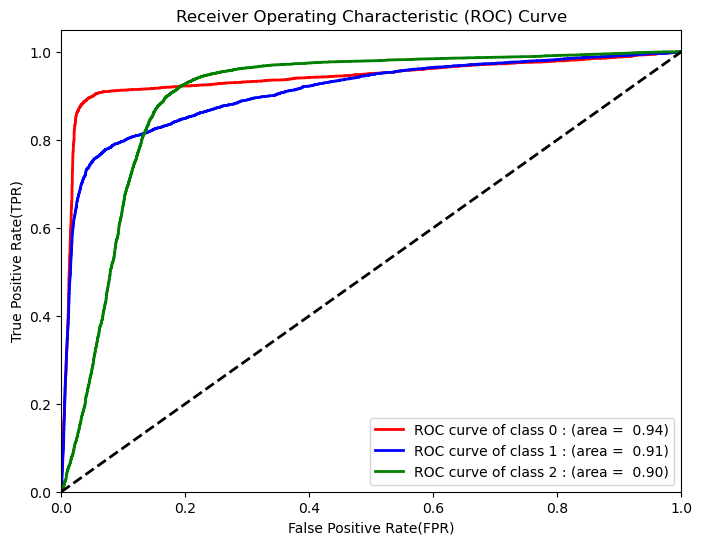

In [408]:
# plot roc curve for each class

# Check if more than one class is present in y_test
if len(set(y_test)) > 1:
    y_test_binarized=label_binarize(y_test, classes=class_order)
    n_classes = y_test_binarized.shape[1]
    y_pred_prob_nb = nb_model.predict_proba(x_test_sc)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y_test_binarized[:,i], y_pred_prob_nb[:,i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:,i], y_pred_prob_nb[:,i])
    # ploting roc curve
    plt.figure(figsize=(8,6))
    colors = cycle(['red', 'blue', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], lw=2, color=color, label = f'ROC curve of class {i} : (area = {roc_auc[i] : .2f})')
    plt.plot([0,1],[0,1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
else:
    print('roc_auc is not defined as only one class is present in y_test')

__Remark__

class 0 is high

class 1 is low 

class 2 is medium

In binary class classification, we need to find the optimal threshold to predict the positive or negative class but in multiclass classification, we don't need optimal threshold bcoz in this more than 2 classes 

1) model has a 94% chance of correctly distinguishing between a positive instance and a negative instance for Class 0(High).
2) model has a 91% chance of correctly distinguishing between a positive instance and a negative instance for Class 1(Low).
3) model has a 90% chance of correctly distinguishing between a positive instance and a negative instance for Class 2(Medium).
4) The model is best at classifying instances of Class 0 due to high auc then followed by class 1 then class 2

__Observation__

1) Class 0/High: The model performs very well in classifying instances of Class 0. An AUC of 0.94 indicates that there is a 94% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance for Class 0.
2) Class 1/Low: The model has excellent performance for Class 1, with an AUC of 0.91. This means the model has a 91% chance of correctly distinguishing between a positive instance and a negative instance for Class 1.
3) Class 2/Medium: The model performs very well for Class 2, with an AUC of 0.90. This indicates a 90% chance of the model correctly distinguishing between a positive instance and a negative instance for Class 2.
4) Note that for example class 2/medium positive instance is medium class and negative instance are high and low classes both. same explanation of positive and negative instance for class 1 and class 0.


Diagonal Line (Black dashed line):

The diagonal line represents random guessing, with an AUC of 0.5. Any ROC curve below this line indicates worse than random performance, while curves above this line indicate better than rand performance

__Key Observaonti__

The Naive Bayes performs exceptionally well for all classes, with AUC values ranging from 0.90 to 0.94. The model is best at classifying instances of Class 0, followed closely by Class 1, and then Class 2.e.

__Applying K-Nearest Neighbor on online_gaming_behavior_dataset.csv dataset__

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train_sc,y_train)

KNeighborsClassifier(n_neighbors=4)

In [216]:
y_train_pred_knn = knn_model.predict(x_train_sc)
y_test_pred_knn = knn_model.predict(x_test_sc)
training_accuracy = accuracy_score(y_train, y_train_pred_knn)
testing_accuracy = accuracy_score(y_test, y_test_pred_knn)

print('K-Nearest Neighbors :')
print()
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

K-Nearest Neighbors :

Training Accuracy : 0.8209408825978352
Testing Accuracy : 0.6895216685400275


The training accuracy (82 %) and testing accuracy (69 %) are relatively not close to each other. This suggests that the model is overfitting to the training data, as the performance on the training set is better or comparable to the testing set

In [221]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, x_train_sc, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())   # try for n_neighbors=5 will get more consistent also less overfitting

Cross-validation scores: [0.68005828 0.66486261 0.67860117 0.66257286 0.67651957]
Mean cross-validation score: 0.6725228975853457


Although model is overfitted but We can see the model is consistent and no biased

Cross-validation helps in checking whether the model just memorizes the training data or if it generalizes well over unseen data. so from above scores we can say model generalize well over unseen data

In [51]:
y_pred_prob_knn = knn_model.predict_proba(x_test_sc)
class_order = knn_model.classes_
print('Class Order :',class_order)

result = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred_knn
})
for i,class_name in enumerate(class_order):
    result[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_knn[:,i], 2)
result

Class Order : ['High' 'Low' 'Medium']


,Actual,Predicted,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.00,0.25,0.75
22227,Medium,High,0.50,0.25,0.25
24899,Medium,Low,0.00,0.50,0.50
35415,Medium,Medium,0.25,0.00,0.75
21440,Medium,Medium,0.25,0.00,0.75
...,...,...,...,...,...
4026,High,High,1.00,0.00,0.00
12568,Medium,Low,0.00,0.75,0.25
33805,Medium,Medium,0.00,0.25,0.75
12554,Low,Low,0.00,0.75,0.25


Confusion Matrix :
[[3132  154  871]
 [ 188 2614 1281]
 [1151 1327 5296]]


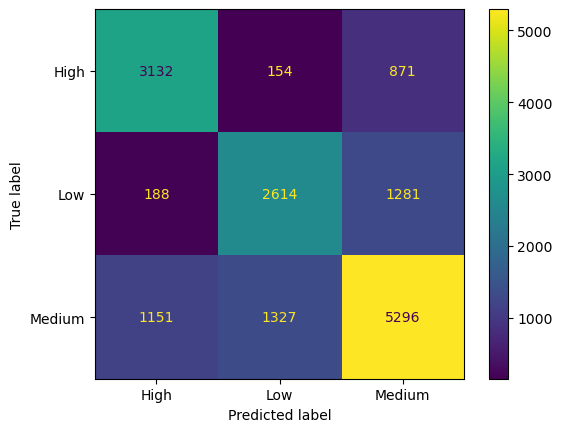

In [60]:
conf_mat_knn = confusion_matrix(y_test, y_test_pred_knn)
print('Confusion Matrix :')
print(conf_mat)

cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn, display_labels=class_order)
cm_display_knn.plot()
plt.show()

In [63]:
conf_mat_df = pd.DataFrame(conf_mat_knn, index=class_order, columns=class_order)
print(conf_mat_df)

        High   Low  Medium
High    3132   154     871
Low      188  2614    1281
Medium  1151  1327    5296


__Observation__

__High:__

- This class has a moderate number of true positives (3132), but also a significant number of false negatives, indicating that many High instances are misclassified as Medium or Low

__Low:__

- This class has a lower number of true positives (2614) and a high number of false negatives, indicating frequent misclassification of Low instances as Medium or High

__Medium:__

- This class has a high number of true positives (5296), indicating the model is relatively good at identifying Medium instances. However, there is still a considerable number of false negatives.

In [78]:
print('KNN Classification Report :')
print(classification_report(y_test, y_test_pred_knn))

KNN Classification Report :
              precision    recall  f1-score   support

        High       0.70      0.75      0.73      4157
         Low       0.64      0.64      0.64      4083
      Medium       0.71      0.68      0.70      7774

    accuracy                           0.69     16014
   macro avg       0.68      0.69      0.69     16014
weighted avg       0.69      0.69      0.69     16014



AUC 0 : 0.875164347720041
AUC 1 : 0.8227592250016746
AUC 2 : 0.7496078148845666


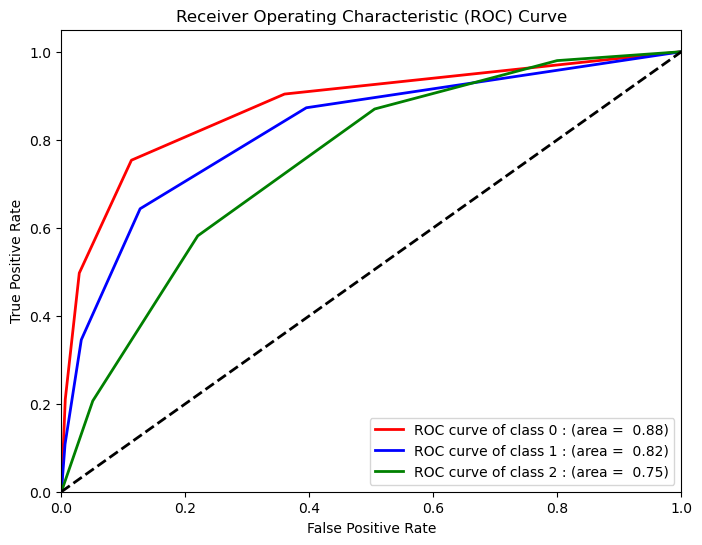

In [119]:
if len(set(y_test)) > 1:
    y_test_binarized = label_binarize(y_test, classes=class_order)
    n_classes = y_test_binarized.shape[1]

    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y_test_binarized[:,i], y_pred_prob_knn[:,i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:,i], y_pred_prob_knn[:,i])
        print(f'AUC {i} : {roc_auc[i]}')
    plt.figure(figsize=(8,6))
    colors = cycle(['red', 'blue', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], lw=2, color=color, label=f'ROC curve of class {i} : (area = {roc_auc[i] : .2f})')
    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC AUC score is not defined as only one class is present in y_true.")

__Observation__

1) Class 0/High: The model performs is well in classifying instances of Class 0. An AUC of 0.88 indicates that there is a 88% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance for Class 0.
2) Class 1/Low: The model performs is well in classifying instances of Class 1. An AUC of 0.84 indicates that there is a 84% chance that the model will correctly distinguish between a randomly choosen positive instance and a randomly chosen negative instance for Class 1.
3) Class 2/Medium: The model performs is moderately well in classifying instances of Class 2. An AUC of 0.75 indicates that there is a 75% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance for Class 2.

__Key Observation__

1) The k-NN classifier performs reasonably well for all classes, with AUC values ranging from 0.75 to 0.88. The model is best at classifying instances of Class 0, followed closely by Class 1, and then Class 2.
2) If the dataset has imbalanced classes (i.e., some classes have significantly more instances than others), this could affect the performance of the model and the ROC curves.

### Applying Desicion Tree on Online Gaming Behavior dataset

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_train_pred_dt = dt_model.predict(x_train_sc)
y_test_pred_dt = dt_model.predict(x_test_sc)

training_accuracy = accuracy_score(y_train, y_train_pred_dt)
testing_accuracy = accuracy_score(y_test, y_test_pred_dt)
print('Decision Tree :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Decision Tree :
Training Accuracy : 1.0
Testing Accuracy : 0.8312726364431122


In [20]:
# cross validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(dt_model, x_train_sc, y_train, cv=5)
print('Cross Validation Scores :',score)
print('Mean Score :',score.mean())

Cross Validation Scores : [0.82764363 0.8184846  0.83492923 0.82743547 0.82264779]
Mean Score : 0.8262281432139884


In [24]:
y_pred_prob_dt=dt_model.predict_proba(x_test_sc)
class_order = dt_model.classes_
result=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred_dt,
})
for i, class_name in enumerate(class_order):
    result[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_dt[:,i],2)
result.head()

,Actual,Predicted,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.0,0.0,1.0
22227,Medium,Medium,0.0,0.0,1.0
24899,Medium,High,1.0,0.0,0.0
35415,Medium,Medium,0.0,0.0,1.0
21440,Medium,High,1.0,0.0,0.0


Confusion Matrix :
[[3392  273  492]
 [ 270 3296  517]
 [ 559  591 6624]]


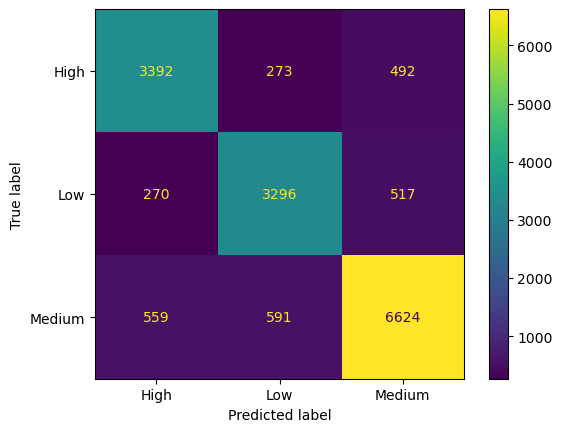

In [26]:
conf_mat = confusion_matrix(y_test, y_test_pred_dt)
print('Confusion Matrix :')
print(conf_mat)


cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_order)
cm_display.plot()
plt.show()

In [28]:
conf_mat_df=pd.DataFrame(conf_mat, index=class_order, columns=class_order)
print(conf_mat_df)

        High   Low  Medium
High    3392   273     492
Low      270  3296     517
Medium   559   591    6624


In [30]:
print('\t\tDecision Tree Classification Report :')
print(classification_report(y_test, y_test_pred_dt))

		Decision Tree Classification Report :
              precision    recall  f1-score   support

        High       0.80      0.82      0.81      4157
         Low       0.79      0.81      0.80      4083
      Medium       0.87      0.85      0.86      7774

    accuracy                           0.83     16014
   macro avg       0.82      0.83      0.82     16014
weighted avg       0.83      0.83      0.83     16014



AUC of Class 0 : 0.873028276237626
AUC of Class 1 : 0.8674165885632739
AUC of Class 2 : 0.8648097748032401


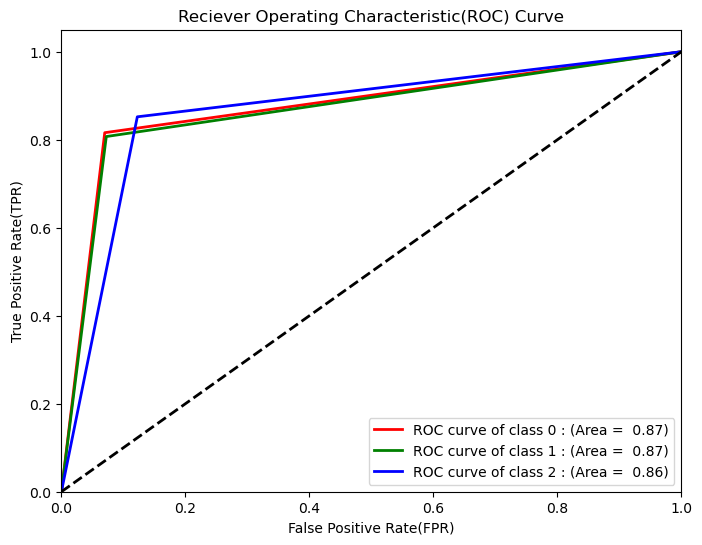

In [41]:
if len(set(y_test)) > 1:
    y_test_binarized = label_binarize(y_test, classes=class_order)
    n_classes = y_test_binarized.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y_test_binarized[:,i], y_pred_prob_dt[:,i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:,i], y_pred_prob_dt[:,i])
        print(f'AUC of Class {i} : {roc_auc[i]}')
    plt.figure(figsize=(8,6))
    colors = cycle(['red', 'green', 'blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], lw=2, color=color, label=f'ROC curve of class {i} : (Area = {roc_auc[i] : .2f})')
    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('Reciever Operating Characteristic(ROC) Curve')
    plt.legend()
    plt.show()

## Random Forest

Random Forest is a __Parallel Ensemble Technique,__ that builds multiple decision trees use for classification and regression tasks. In a Random Forest, multiple decision trees are built independently (in parallel), and their outputs are aggregated or combine their predictions (usually by majority voting for classification or averaging for regression)to improve performance and reduce overfitting. So, Random Forest is basically a classifier where your model is decision tree, and you can add any number of decision trees.

__Benefits of Random Forest__

- Reduces Overfitting: Majority voting of the prediction of multiple decision tree reduces the risk of overfitting seen with single decision tree algorithm.
- Improve Generalization: Combined the prediction of multiple decision tree enhance the model ability to generalize to new unseen data.
- Robust prediction 

### Applying Random Forest on Online Gaming Behavior Dataset

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train_sc, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_train_pred_rf=rf_model.predict(x_train_sc)
y_test_pred_rf=rf_model.predict(x_test_sc)

training_accuracy=accuracy_score(y_train, y_train_pred_rf)
testing_accuracy=accuracy_score(y_test, y_test_pred_rf)

print('Random Forest Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Random Forest Classifier :
Training Accuracy : 1.0
Testing Accuracy : 0.8989634070188585


We can see the model is overfitted we can fix the overfitting by introducing the multiple decision tree and max_depth in randomforest classifier see below

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_model1=RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)
rf_model1.fit(x_train_sc, y_train)

RandomForestClassifier(max_depth=7, n_estimators=150, random_state=42)

In [85]:
y_train_pred_rf=rf_model1.predict(x_train_sc)
y_test_pred_rf=rf_model1.predict(x_test_sc)

training_accuracy=accuracy_score(y_train, y_train_pred_rf)
testing_accuracy=accuracy_score(y_test, y_test_pred_rf)

print('Random Forest Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Random Forest Classifier :
Training Accuracy : 0.8363863447127394
Testing Accuracy : 0.8202198076682903


So we can see the model is generalize well on training and testing data without overfitting by introducing the multiple decision tree and maximum depth of tree

In [88]:
# cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=cross_val_score(rf_model1, x_train_sc, y_train, cv=kfold)
print('Cross Validation Scores :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Scores : [0.82535387 0.83888426 0.84013322 0.81515404 0.83597002]
CV Scores Mean : 0.8310990840965863


So we can see the cross validation score having no bias and random forest model is consistent

In [96]:
y_pred_prob=rf_model1.predict_proba(x_test_sc)
class_order=rf_model1.classes_
result=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred_rf
})
for i, class_name in enumerate(class_order):
    result[f'Predicted Probability {class_name}'] = np.round(y_pred_prob[:,i], 2)
result

,Actual,Predicted,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.15,0.19,0.66
22227,Medium,Medium,0.29,0.12,0.59
24899,Medium,Medium,0.12,0.43,0.45
35415,Medium,Medium,0.23,0.15,0.62
21440,Medium,Medium,0.30,0.12,0.58
...,...,...,...,...,...
4026,High,High,0.71,0.07,0.22
12568,Medium,Medium,0.10,0.22,0.68
33805,Medium,Medium,0.21,0.15,0.64
12554,Low,Low,0.06,0.57,0.38


Confusion Matrix :
[[3192  109  856]
 [ 106 2747 1230]
 [ 339  239 7196]]


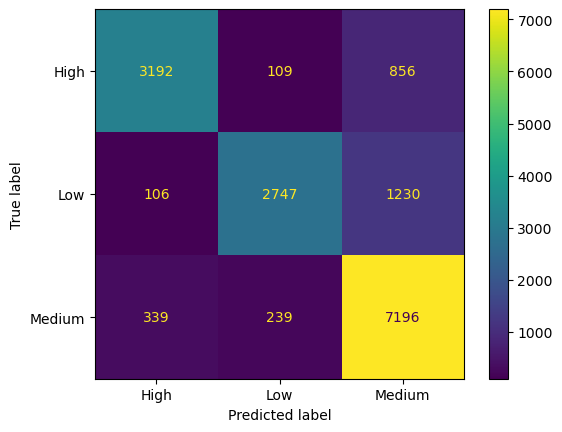

In [98]:
conf_mat = confusion_matrix(y_test, y_test_pred_rf)
print('Confusion Matrix :')
print(conf_mat)

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_order)
cm_display.plot()
plt.show()

In [100]:
cm_mat=pd.DataFrame(conf_mat, index=class_order, columns=class_order)
cm_mat

,High,Low,Medium
High,3192,109,856
Low,106,2747,1230
Medium,339,239,7196


In [114]:
print('Random Forest Classification Report :')
print(classification_report(y_test, y_test_pred_rf))

Random Forest Classification Report :
              precision    recall  f1-score   support

        High       0.88      0.77      0.82      4157
         Low       0.89      0.67      0.77      4083
      Medium       0.78      0.93      0.84      7774

    accuracy                           0.82     16014
   macro avg       0.85      0.79      0.81     16014
weighted avg       0.83      0.82      0.82     16014



AUC of class 0 : 0.9300945926691275
AUC of class 1 : 0.9370520832775231
AUC of class 2 : 0.9224143023421363


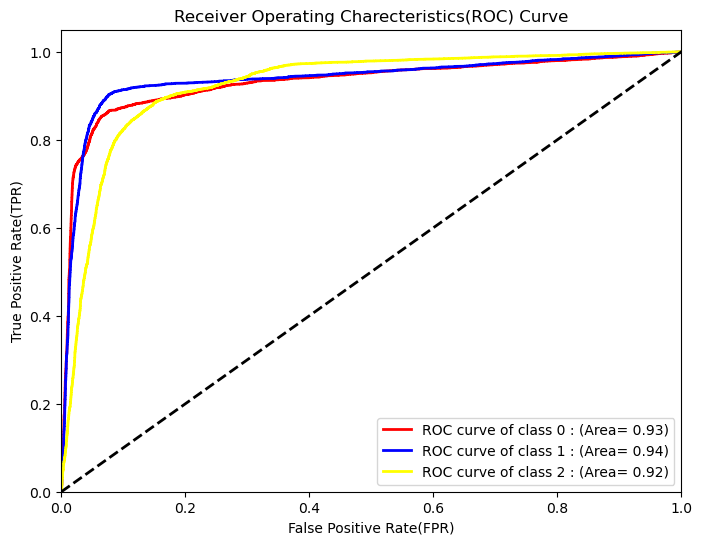

In [116]:
if len(set(y_test)) > 1:
    y_test_binarized=label_binarize(y_test, classes=class_order)
    n_classes=y_test_binarized.shape[1]

    fpr=dict()
    tpr=dict()
    roc_auc=dict()

    for i in range(n_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y_test_binarized[:,i], y_pred_prob[:,i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:,i], y_pred_prob[:,i])
        print(f'AUC of class {i} : {roc_auc[i]}')
    plt.figure(figsize=(8,6))
    colors=cycle(['red', 'blue', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], lw=2, color=color, label=f'ROC curve of class {i} : (Area={roc_auc[i] : .2f})')
    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('Receiver Operating Charecteristics(ROC) Curve')
    plt.legend()
    plt.show()

__Obsevation:__

1) The model performs is well in classifying instances of Class 0(High). Model has a 93% chance of correctly distinguishing between a positive instance and a negative instance for Class 0(High).
2) The model performs is excellent in classifying instances of Class 1(Low). Model has a 94% chance of correctly distinguishing between a positive instance and a negative instance for Class 1(Low).
3) The model performs is well in classifying instances of Class 2(Medium). Model has a 92% chance of correctly distinguishing between a positive instance and a negative instance for Class 2(Medium).
4) The model is best at classifying instances of Class 1 due to high auc then followed by class 0 then class 2

The Random Forest classifier performs reasonably well for all classes, with AUC values ranging from 0.92 to 0.94.